**<span style="color: #808080;">In The Name of God</span>**

---

**<span style="color: #808080;">Mani hosseini</span>**

**<span style="color: #808080;">SID:</span> <span style="color: #808080;">810102552</span>**

# <span style="color:rgb(143, 0, 255);">Task #1</span>
# <span style="color: #8F00FF;">Langevin Dynamics
</span>


## <span style="color: #808080;">Part 1:</span>  


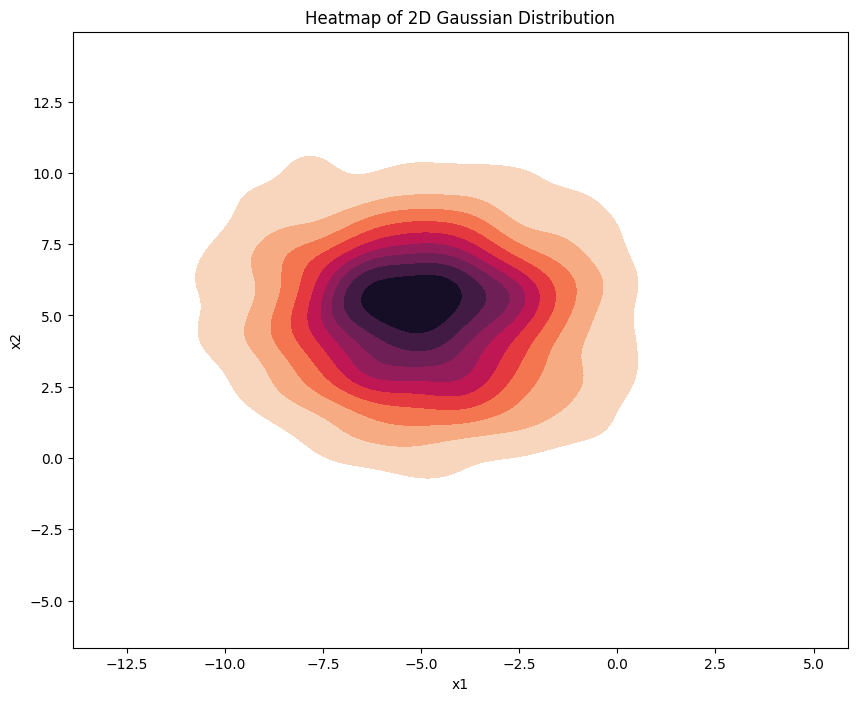

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import multivariate_normal

mean = [-5, 5]
cov = [[5, 0], [0, 5]]
size=1000
samples = multivariate_normal(mean, cov, size)


plt.figure(figsize=(10, 8))
sns.kdeplot(x=samples[:, 0], y=samples[:, 1],fill=True,cmap="rocket_r")
plt.title("Heatmap of 2D Gaussian Distribution")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()



# heatmap, xedges, yedges = np.histogram2d(samples[:, 0], samples[:, 1], bins=100)
# plt.figure(figsize=(10, 8))
# sns.heatmap(heatmap.T, cmap="rocket_r", xticklabels=xedges.round(1), yticklabels=yedges.round(1))


## <span style="color: #808080;">Part 2:</span>  
### <span style="color: #8F00FF;">**Score Function for a 2D Gaussian**
$$
\nabla_{\mathbf{x}} \log p(\mathbf{x}) = -\Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})
$$

$$ \boldsymbol{\mu} = [-5, 5] $$
$$ \Sigma = \begin{bmatrix} 5 & 0 \\ 0 & 5 \end{bmatrix} $$


$$
\Sigma^{-1} = \begin{bmatrix} \frac{1}{5} & 0 \\ 0 & \frac{1}{5} \end{bmatrix}
$$

$$
\nabla_{\mathbf{x}} \log p(\mathbf{x}) = -\begin{bmatrix} \frac{1}{5} & 0 \\ 0 & \frac{1}{5} \end{bmatrix} \begin{bmatrix} x_1 + 5 \\ x_2 - 5 \end{bmatrix} = -\begin{bmatrix} \frac{x_1 + 5}{5} \\ \frac{x_2 - 5}{5} \end{bmatrix}
$$


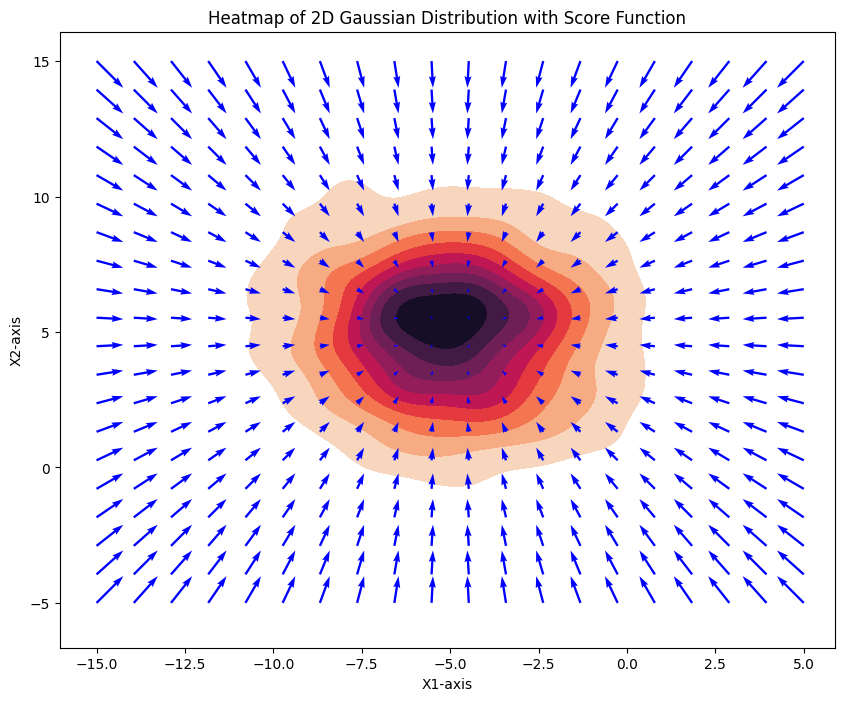

In [3]:

def score_function(x, cov, mean):
    inv_cov = np.linalg.inv(cov)
    return -inv_cov @ (x - mean)

x1 = np.linspace(-15, 5, 20)
x2 = np.linspace(-5, 15, 20)
x1_grid, x2_grid = np.meshgrid(x1, x2)

x1_table = np.zeros((len(x2), len(x1)))
x2_table = np.zeros((len(x2), len(x1)))

for i in range(len(x1)):
    for j in range(len(x2)):
        pos = np.array([x1[i], x2[j]])
        score = score_function(pos, cov, mean)
        x1_table[j, i] = score[0]
        x2_table[j, i] = score[1]

plt.figure(figsize=(10, 8))
sns.kdeplot(x=samples[:, 0], y=samples[:, 1], fill=True, cmap="rocket_r")
plt.quiver(x1_grid, x2_grid, x1_table, x2_table, color='blue')
plt.title("Heatmap of 2D Gaussian Distribution with Score Function")
plt.xlabel("X1-axis")
plt.ylabel("X2-axis")
plt.show()


## <span style="color: #808080;">Part 3:</span>  
### <span style="color: #8F00FF;">**applying Langevin method on a set of initial numbers**

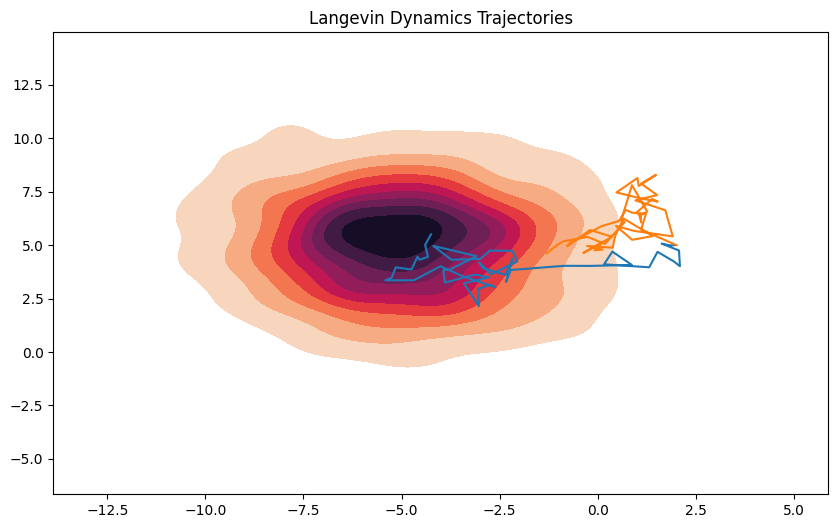

In [7]:
def langevin_dynamics(initial_points, score_function, mean, cov, n_steps=50, step_size=0.1):
    samples = np.zeros((n_steps, len(initial_points), 2))
    samples[0] = initial_points 

    for i in range(n_steps - 1):
        scores = np.array([score_function(x, cov,mean) for x in samples[i]])
        noise = np.random.randn(len(initial_points), 2)
        samples[i+1] = samples[i] + step_size * scores + np.sqrt(2 * step_size) * noise

    return samples


initial_points=np.array([2,5])
trajectories=langevin_dynamics(initial_points,score_function,mean,cov)
plt.figure(figsize=(10, 6))
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1])


sns.kdeplot(x=samples[:, 0], y=samples[:, 1], fill=True, cmap="rocket_r")
plt.title("Langevin Dynamics Trajectories")
plt.show()


## <span style="color: #808080;">Part 4:</span>  
### <span style="color: #8F00FF;">**Comparsion with numpy.random.multivariate_normal**

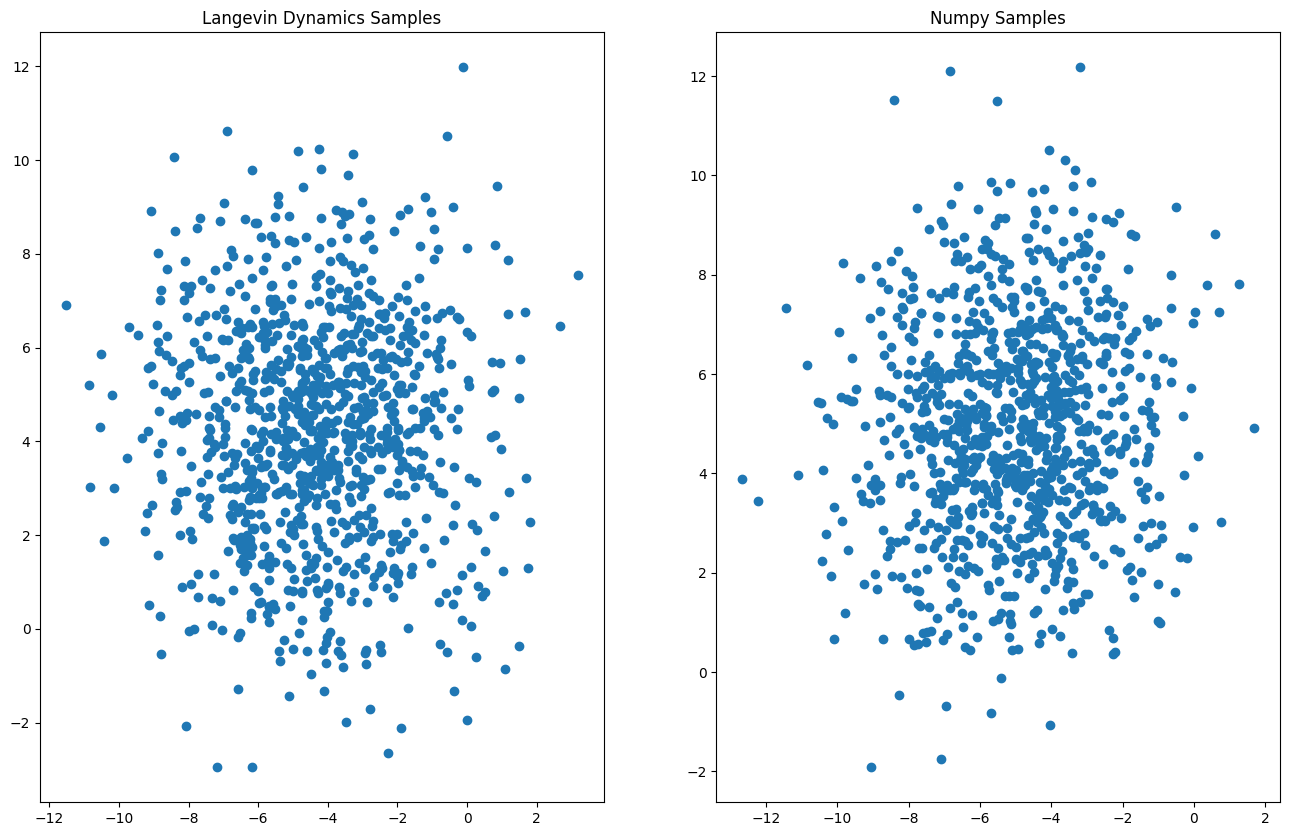

Langevin Samples:
Mean: [-4.34692612  4.23227784]
Covariance:
 [[ 5.63428216 -0.01048926]
 [-0.01048926  5.72299269]]
Numy Samples:
Mean: [-5.07031362  4.92174055]
Covariance:
 [[4.84162592 0.32980483]
 [0.32980483 4.77924934]]


In [5]:
mean = [-5, 5]
cov = [[5, 0], [0, 5]]
size=1000




def gen_langevin_samples(n_samples, n_steps=1000, step_size=0.01):
    initial_points = np.random.uniform(low=-10, high=10, size=(n_samples, 2))
    trajectories = langevin_dynamics(initial_points, score_function, mean, cov, n_steps, step_size)
    return trajectories[-1]



numpy_samples = multivariate_normal(mean, cov, size)
langevin_samples = gen_langevin_samples(1000)


plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.scatter(langevin_samples[:, 0], langevin_samples[:, 1])
plt.title("Langevin Dynamics Samples")

plt.subplot(1, 2, 2)
plt.scatter(numpy_samples[:, 0], numpy_samples[:, 1])
plt.title("Numpy Samples")
plt.show()




print("Langevin Samples:")
print("Mean:", np.mean(langevin_samples, axis=0))
print("Covariance:\n", np.cov(langevin_samples.T))

print("Numy Samples:")
print("Mean:", np.mean(numpy_samples, axis=0))
print("Covariance:\n", np.cov(numpy_samples.T))